# Amazon Booking

## Importando bibliotecas

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

## Ler arquivos CSV

In [64]:
df_books = pd.read_csv("Dataset-Amazon/BX-Books.csv", sep=';', dtype = 'unicode', encoding='Latin-1', usecols = ['ISBN','BookTitle','BookAuthor','YearOfPublication','Publisher'])

In [65]:
df_bookRatings = pd.read_csv("Dataset-Amazon/BX-Book-Ratings.csv", sep=';', dtype = {"UserID": int, "ISBN": str, "BookRating": int}, encoding='Latin-1', usecols = ['UserID','ISBN','BookRating'])

In [66]:
df_users = pd.read_csv("Dataset-Amazon/BX-Users.csv", sep=';', dtype = {"UserID": int, "ISBN": str, "BookRating": int}, encoding='Latin-1', usecols = ['UserID','Location','Age'])

## ler os 5 primeiros registros de cada dataset

In [5]:
df_books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
df_bookRatings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [7]:
df_users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Quantidade de Notas no dataset

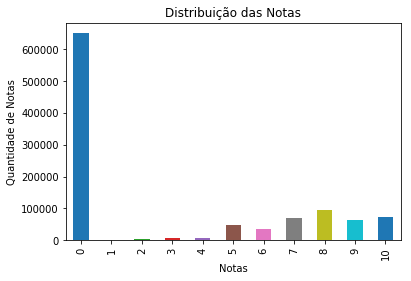

In [8]:
df_bookRatings.BookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Notas')
plt.show()

## Distribuição da idade dos consumidores que avaliaram um livro

In [9]:

#df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])

## Qual os 10 livros que tiveram mais recomendações

In [67]:
rating_count = pd.DataFrame(df_bookRatings.groupby('ISBN')['BookRating'].count())
rating_count.sort_values('BookRating', ascending = False).head(10)

,BookRating
ISBN,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662
044023722X,595
679781587,578
142001740,555
067976402X,552


## Quais são esses 10 livros

In [68]:
df_top10 = pd.DataFrame(['971880107','316666343','385504209','312195516','60928336','044023722X','679781587','142001740','067976402X','671027360'], index=np.arange(10), columns={'ISBN'})
df_books_top10 = pd.merge(df_top10, df_books, on='ISBN')
#df_books_top10 = pd.DataFrame(df_books, columns = ['ISBN'])
df_books_top10

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,971880107,Wild Animus,Rich Shapero,2004,Too Far
1,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
5,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
6,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
7,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
8,671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


## Clientes que avaliaram o livro 1, livro 2 e livro 3

## Clientes que avaliaram o livro 1 e 2, mas não leram o livro 3

## Media da nota do livro

In [69]:
df_nota_media = pd.DataFrame(df_bookRatings.groupby('ISBN')['BookRating'].mean())
df_nota_media['ratingCount'] = pd.DataFrame(df_bookRatings.groupby('ISBN')['BookRating'].count())
df_nota_media.sort_values('ratingCount', ascending = False).head(10)

,BookRating,ratingCount
ISBN,,
971880107,1.032244,2264
316666343,4.457045,1164
385504209,4.691267,813
312195516,4.326347,668
60928336,3.462236,662
044023722X,3.166387,595
679781587,4.378893,578
142001740,4.331532,555
067976402X,3.278986,552


In [13]:
df_nota_media.dtypes

BookRating     float64
ratingCount      int64
dtype: object

## Clientes que avaliaram mais de 1 livro

In [70]:
df_clientemaisde1livro = pd.DataFrame(df_bookRatings.groupby('UserID')['BookRating'].count())
df_clientemaisde1livro.sort_values('BookRating', ascending = False).head(10)

,BookRating
UserID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
212898,4785
278418,4533
76352,3367
110973,3100


## Lista de livros avaliados pelos 10 clientes que mais avaliaram livros

### Cliente #1, ID 11676 - 13602 livros avaliados

In [15]:
df_cliente11676 = df_bookRatings[(df_bookRatings.UserID == 11676)]
df_cliente11676.head()

,UserID,ISBN,BookRating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7


### Cliente #2, ID 198711 - 7550 livros avaliados

In [16]:
df_cliente198711 = df_bookRatings[(df_bookRatings.UserID == 198711)]
df_cliente198711.head()

,UserID,ISBN,BookRating
816071,198711,000123207X,0
816072,198711,1232088,0
816073,198711,1931377,0
816074,198711,000225218X,0
816075,198711,3293459,0


### Cliente #3, ID 153662 - 6109 livros avaliados

In [17]:
df_cliente153662 = df_bookRatings[(df_bookRatings.UserID == 153662)]
df_cliente153662.head()

,UserID,ISBN,BookRating
631933,153662,2241447,0
631934,153662,000647036X,0
631935,153662,20434901,0
631936,153662,20973403,0
631937,153662,28604202,0


### Cliente #4, ID 98391 - 5891 livros avaliados

In [18]:
df_cliente98391 = df_bookRatings[(df_bookRatings.UserID == 98391)]
df_cliente98391.head()

,UserID,ISBN,BookRating
405912,98391,60001445,8
405913,98391,60001453,9
405914,98391,60001461,8
405915,98391,006000147X,9
405916,98391,60001801,8


### Cliente #5, ID 35859 - 5850 livros avaliados

In [19]:
df_cliente35859 = df_bookRatings[(df_bookRatings.UserID == 35859)]
df_cliente35859.head()

,UserID,ISBN,BookRating
157178,35859,4722124,10
157179,35859,6543936,0
157180,35859,6547230,0
157181,35859,7101937,0
157182,35859,20186002,0


### Cliente #6, ID 212898 - 4785 livros avaliados


In [20]:
df_cliente212898 = df_bookRatings[(df_bookRatings.UserID == 212898)]
df_cliente212898.head()

,UserID,ISBN,BookRating
877802,212898,1251782,0
877803,212898,2226642,0
877804,212898,2228580,0
877805,212898,000222870X,0
877806,212898,2233495,0


### Cliente #7, ID 278418 - 4533 livros avaliados

In [21]:
df_cliente278418 = df_bookRatings[(df_bookRatings.UserID == 278418)]
df_cliente278418.head()

,UserID,ISBN,BookRating
4330,278418,6128831,0
4331,278418,6542808,5
4332,278418,20209606,0
4333,278418,20418809,0
4334,278418,20420900,0


### Cliente #8, ID 76352 - 3367 livros avaliados


In [22]:
df_cliente76352 = df_bookRatings[(df_bookRatings.UserID == 76352)]
df_cliente76352.head()

,UserID,ISBN,BookRating
316357,76352,1981625,0
316358,76352,6172768,0
316359,76352,20198906,0
316360,76352,20446500,0
316361,76352,27862704,0


### Cliente #9, ID 110973 - 3100 livros avaliados

In [23]:
df_cliente110973 = df_bookRatings[(df_bookRatings.UserID == 110973)]
df_cliente110973.head()

,UserID,ISBN,BookRating
462316,110973,6514634,0
462317,110973,20178557,0
462318,110973,20778201,0
462319,110973,25631403,0
462320,110973,28604199,0


### Cliente #10, ID 235105 - 3067 livros avaliados

In [24]:
df_cliente235105 = df_bookRatings[(df_bookRatings.UserID == 235105)]
df_cliente235105.head()

,UserID,ISBN,BookRating
974578,235105,000250653X,0
974579,235105,4490509,0
974580,235105,20199600,9
974581,235105,002026478X,0
974582,235105,20780605,8


In [25]:
frames = [df_cliente11676,df_cliente198711,df_cliente153662,df_cliente98391,df_cliente35859,df_cliente212898,df_cliente278418,df_cliente76352,df_cliente110973,df_cliente235105]
df_Booktop10client = pd.concat(frames)
df_Booktop10client.head()

,UserID,ISBN,BookRating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7


In [26]:
## http://artedosdados.blogspot.com/2015/02/regras-de-associacao-em-python-modulo.html

# Criando as transações

## Buscando clientes que avaliaram mais de um livro e livros com avaliações altas

In [77]:
df_clientemaisde1livro = df_clientemaisde1livro.loc[df_clientemaisde1livro['BookRating'] > 0]
df_clientemaisde1livroIDs = pd.DataFrame(df_clientemaisde1livro.index)

#ratings maiores ou iguais a 8
df_bookRatingsHigh = df_bookRatings.loc[df_bookRatings['BookRating'] >= 8]

#join
df_avaliacoes = df_bookRatingsHigh.join(df_clientemaisde1livroIDs.set_index('UserID'), on='UserID')
#df_avaliacoes.sort_values(by='UserID', ascending = True)
df_avaliacoes = df_avaliacoes.sort_values('UserID')

## Criando as transações para esses clientes

In [78]:
transactions = []
tran = []

userAnt = ''
for i in np.arange(0, len(df_avaliacoes), 1):
    linha = df_avaliacoes.iloc[i]
    if userAnt != linha.UserID:
        transactions.append(tran)
        tran = []
        userAnt = linha.UserID
    
    tran.append(linha.ISBN)
    
transactions.pop(0)

[]

In [80]:
from apyori import apriori
rules = apriori(transactions, min_length=1, min_support=0.5, min_confidence=0.5, min_lift=1)

In [104]:
list(rules)

[]